## Project: Wrangle and Analyze Data - WeRateDogs

### Gathering data

In [416]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
%matplotlib inline

pd.set_option('display.max_colwidth', -1)

In [417]:
# Import the Twitter archive CSV file into a DataFrame
df_1 = pd.read_csv('twitter-archive-enhanced.csv')

In [418]:
df_1.shape

(2356, 17)

In [419]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [420]:
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [421]:
import requests
# Download tweet image predictions TSV using the Requests library and write it to image_predictions.tsv
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

# we use requests.get on a url that returns a response
response = requests.get(url)

# the data is stored in response variable which we can access using response.content

with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)
# "wb" means that you are writing to the file (w), and that you are writing in binary mode (b).
    
# Import the tweet image predictions TSV file into a DataFrame
img_df = pd.read_csv('image_predictions.tsv', sep='\t')

In [422]:
img_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file

consumer_key = 'X4Brx0KqE3BHMhfM7klRQzGb5'
consumer_secret = '8KBd6D3cjoNH02Iv3SQuyZDY62xxIjO6qFHI0C3msHBCslg4H9'
access_token = '901126343823327234-k6ITYAZnJsAwHqSpc8z4aTTfEhiM6bt'
access_secret = 'GZaqeDQ3Vxy6GiNIhZavJIJ5QveLSkM4BbUHeaWWMmj9j'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w', encoding = 'utf8') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in df_1['tweet_id']:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [423]:
# List of dictionaries to read tweet's JSON data line by line and later convert to a DataFrame
df_list = []
with open('tweet-json.txt', 'r') as json_file:
    for line in json_file:
        status = json.loads(line)
        
        # Append to list of dictionaries
        df_list.append({'tweet_id': status['id'],
                        'retweet_count': status['retweet_count'],
                        'favorite_count': status['favorite_count'],
                        'display_text_range': status['display_text_range']
                       })

# Create a DataFrame with tweet ID, retweet count, favorite count and display_text_range
status_df = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'display_text_range'])

In [424]:
status_df.head()

,tweet_id,retweet_count,favorite_count,display_text_range
0,892420643555336193,8853,39467,"[0, 85]"
1,892177421306343426,6514,33819,"[0, 138]"
2,891815181378084864,4328,25461,"[0, 121]"
3,891689557279858688,8964,42908,"[0, 79]"
4,891327558926688256,9774,41048,"[0, 138]"


### Assessing the data

In [425]:
# creating a copy of df_1 as df, because using df is easier and faster instead of long names like df_1 or twitter_achive
df = df_1.copy()

In [426]:
df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1626,684800227459624960,NaN,NaN,2016-01-06 18:14:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Theodore. He's dapper as hell. Probably owns horses. Uses 'summer' as a verb. Often quotes philosophers. 11/10 https://t.co/J3Ld4fRbSy,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684800227459624960/photo/1,11,10,Theodore,None,None,None,None
998,748307329658011649,NaN,NaN,2016-06-30 00:09:04 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This sherk must've leapt out of the water and into the canoe, trapping the human. Won't even help paddle smh. 7/10 https://t.co/KubWEqOIgO",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/748307329658011649/photo/1,https://twitter.com/dog_rates/status/748307329658011649/photo/1",7,10,None,None,None,None,None
1346,704480331685040129,NaN,NaN,2016-03-01 01:36:14 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Lucia. She's a Cumulonimbus Floofmallow. Only has two legs tho (unfortunate). 11/10 would definitely still pet https://t.co/qv6qlEUCEe,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704480331685040129/photo/1,11,10,Lucia,None,None,None,None
1158,724049859469295616,NaN,NaN,2016-04-24 01:38:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Kreggory. He just took a look at his student debt. 10/10 can't even comprehend it https://t.co/XTsZTgilnT,NaN,NaN,NaN,https://twitter.com/dog_rates/status/724049859469295616/photo/1,10,10,Kreggory,None,None,None,None
653,792050063153438720,NaN,NaN,2016-10-28 17:07:05 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Remus. He's a mop that came to life. Can't see anything. Constantly trips over himself. Still a very good dog. 11/10 https://t.co/S3f1SYylzu,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/792050063153438720/photo/1,https://twitter.com/dog_rates/status/792050063153438720/photo/1",11,10,Remus,None,None,None,None


df columns

- **tweet_id**: the unique identifier for each tweet

- **in_reply_to_status_id**: if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID
- **in_reply_to_user_id**: if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s author ID
- **timestamp**: time when this Tweet was created
- **source**: utility used to post the Tweet, as an HTML-formatted string. e.g. Twitter for Android, Twitter for iPhone, Twitter Web Client
- **text**: actual UTF-8 text of the status update
- **retweeted_status_id**: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s ID
- **retweeted_status_user_id**: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s author ID
- **retweeted_status_timestamp**: time of retweet
- **expanded_urls**: tweet URL
- **rating_numerator**: numerator of the rating of a dog. Note: ratings almost always greater than 10
- **rating_denominator**: denominator of the rating of a dog. Note: ratings almost always have a denominator of 10
- **name**: name of the dog
- **doggo**: one of the 4 dog "stage"
- **floofer**: one of the 4 dog "stage"
- **pupper**: one of the 4 dog "stage"
- **puppo**: one of the 4 dog "stage"

In [427]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [428]:
# total missing values for each features
df.isnull().sum()

tweet_id                      0   
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                     0   
source                        0   
text                          0   
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                 59  
rating_numerator              0   
rating_denominator            0   
name                          0   
doggo                         0   
floofer                       0   
pupper                        0   
puppo                         0   
dtype: int64

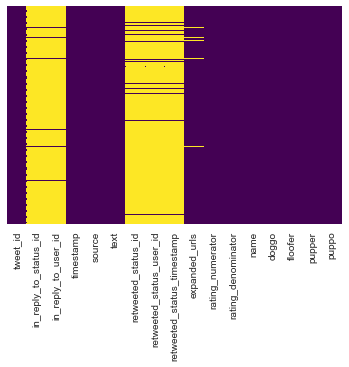

In [429]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis');

in_reply_to_status_id, in_reply_to_user_id,retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp have a lot of missing values as shown above.

expanded_urls also has a few missing values.

In [430]:
img_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


img_df` (tweet image predictions) columns:
    
- **tweet_id**: the unique identifier for each tweet
- **jpg_url**: dog's image URL
- **img_num**: the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images)
- **p1**: algorithm's #1 prediction for the image in the tweet
- **p1_conf**: how confident the algorithm is in its #1 prediction
- **p1_dog**: whether or not the #1 prediction is a breed of dog
- **p2**: algorithm's #2 prediction for the image in the tweet
- **p2_conf**: how confident the algorithm is in its #2 prediction
- **p2_dog**: whether or not the #2 prediction is a breed of dog
- **p3**: algorithm's #3 prediction for the image in the tweet
- **p3_conf**: how confident the algorithm is in its #3 prediction
- **p3_dog**: whether or not the #3 prediction is a breed of dog

In [431]:
img_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [432]:
status_df.sample(5)

,tweet_id,retweet_count,favorite_count,display_text_range
1797,677187300187611136,1033,2981,"[0, 139]"
833,768193404517830656,4080,12157,"[0, 115]"
1380,700864154249383937,685,2828,"[0, 104]"
754,778748913645780993,1562,7717,"[0, 85]"
766,777641927919427584,4947,0,"[0, 102]"


status_df (tweet status) columns:

- **id**: the unique identifier for each tweet
- **retweet_count**: number of times this Tweet has been retweeted
- **favorite_count**: indicates approximately how many times this Tweet has been liked by Twitter users
- **display_text_range**: an array of two unicode code point indices, identifying the inclusive start and exclusive end of the displayable content of the Tweet

In [433]:
status_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id              2354 non-null int64
retweet_count         2354 non-null int64
favorite_count        2354 non-null int64
display_text_range    2354 non-null object
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


### Assessing data quality

> **df**

In [434]:
df['rating_denominator'].value_counts().sort_index()

0      1   
2      1   
7      1   
10     2333
11     3   
15     1   
16     1   
20     2   
40     1   
50     3   
70     1   
80     2   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
Name: rating_denominator, dtype: int64

In [435]:
df['rating_numerator'].value_counts().sort_index()

0       2  
1       9  
2       9  
3       19 
4       17 
5       37 
6       32 
7       55 
8       102
9       158
10      461
11      464
12      558
13      351
14      54 
15      2  
17      1  
20      1  
24      1  
26      1  
27      1  
44      1  
45      1  
50      1  
60      1  
75      2  
80      1  
84      1  
88      1  
99      1  
121     1  
143     1  
144     1  
165     1  
182     1  
204     1  
420     2  
666     1  
960     1  
1776    1  
Name: rating_numerator, dtype: int64

In [436]:
df['name'].sample(10)

1944    Riley   
19      Canela  
2283    Joshwa  
2323    None    
1659    None    
1919    Bob     
2296    Clybe   
1307    Finnegus
2301    None    
1371    None    
Name: name, dtype: object

### Enlisting quality issues identified in df table

-  many tweet_id(s) of df table are missing in img_df (image predictions) table
- lots of missing values in "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp" variables.
- contains retweets and therefore, duplicates
- Incorrect datatype of "timestamp" variable.
- The value in rating_denominator should be always 10. But some other values are also present.
- rating_numerator almost always greater than 10; but some records have values less than 10
- Outliers present in rating_numerator(e.g.1776)
- Inconsistent pattern in the values in name column 
- some of the values in name column are incorrect e.g "his", "a", "an", "actually","by"


> **img_df**

- has only 2075 rows while df has 2376 rows indicating that we do not have images of certain tweet_ids
- Inconsistent pattern in values in p1, p2, p3 variables (first letter is in upper case and sometimes in lower case)


### > Tidiness Issues

- Columns 'doggo', 'floofer', 'pupper', 'puppo' in df should be in one column – stage
- img_df table should be merged with df on tweet_id
- status_df table should be merged with df on tweet_id

### Cleaning the data

In [437]:
# creating a copy of tables before cleaning tasks are performed
df_clean = df.copy()
img_df_copy = img_df.copy()
status_df_copy = status_df.copy()

**df_clean: many tweet_id(s) of df_clean table are missing in img_df (image predictions) table**

**Define**

Keep only those records in df_clean table whose tweet_id exists in img_df table

**Code**

In [438]:
df_clean = df_clean[df_clean['tweet_id'].isin(img_df['tweet_id'])]

**Test**

In [439]:
img_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [440]:
#df_clean should also now have only 2075 tweet_id(s)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2075 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2075 non-null object
source                        2075 non-null object
text                          2075 non-null object
retweeted_status_id           81 non-null float64
retweeted_status_user_id      81 non-null float64
retweeted_status_timestamp    81 non-null object
expanded_urls                 2075 non-null object
rating_numerator              2075 non-null int64
rating_denominator            2075 non-null int64
name                          2075 non-null object
doggo                         2075 non-null object
floofer                       2075 non-null object
pupper                        2075 non-null object
puppo                         2075 non-null object
dtypes: float64(4), int64(3), objec

**df_clean: contains retweets and therefore, duplicates**

**Define**

Keep only those rows in df_clean that are original tweets and NOT retweets (i.e. rows where retweeted_status_id column is null)

**Code**

In [441]:
df_clean = df_clean[df_clean['retweeted_status_id'].isnull()]

In [442]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
dtypes: float64(4), int64(3), object(1

**Test**

In [443]:
len(df_clean[df_clean['retweeted_status_id'].isnull() == False])

0

**retweeted_status_id, retweeted_status_user_id , retweeted_status_timestamp in df_clean have no values now. Hence can be dropped.**

**Define**

Drop retweeted_status_id, retweeted_status_user_id , retweeted_status_timestamp from df_clean

**Code**

In [444]:
df_clean = df_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1)

**Test**

In [445]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
doggo                    1994 non-null object
floofer                  1994 non-null object
pupper                   1994 non-null object
puppo                    1994 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 233.7+ KB


In [446]:
len(df_clean[~df_clean.tweet_id.isin(img_df.tweet_id)])

0

**timestamp variable datatype object makes it unusable for feature engineering.**

**Define**

Change datatype of timestamp variable to datetime using to_datetime function of pandas

**Code**

In [447]:
df_clean['timestamp']=pd.to_datetime(df_clean['timestamp'])

**Test**

In [448]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
doggo                    1994 non-null object
floofer                  1994 non-null object
pupper                   1994 non-null object
puppo                    1994 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(8)
memory usage: 233.7+ KB


**in_reply_to_status_id, in_reply_to_user_id do not appear to be useful for analysis. So need to be dropped**

**Define**

drop in_reply_to_status_id, in_reply_to_user_id from df_clean

**Code**

In [449]:
df_clean = df_clean.drop(['in_reply_to_status_id','in_reply_to_user_id'], axis=1)

**Test**

In [450]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 202.5+ KB


**source column contains html tags**
e.g. <a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for ihone</a>

**Define**

Strip all the html tags from values in source variable. Keep only the text between the tags. 

**Code**

In [451]:
from bs4 import BeautifulSoup

In [452]:
df_clean['source'][0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [453]:
# Trying get_text() on first value to see if it works
BeautifulSoup(df_clean['source'][0], "lxml").get_text()

'Twitter for iPhone'

In [454]:
# Extracting just the text from the HTML tags and storing in df['clean_source']
df_clean['clean_source']=df_clean['source'].apply(lambda x: BeautifulSoup(x, "lxml").get_text())

In [455]:
# Dropping df['source']
df_clean = df_clean.drop('source', axis =1)

In [456]:
# renaming clean_source to source
df_clean=df_clean.rename(columns ={'clean_source': 'source'})

In [457]:
# changing df['source'] to category datatype
df_clean['source']=df_clean['source'].astype('category')

**Test**

In [458]:
# checking if name change and datatype change was successful
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null datetime64[ns]
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
source                1994 non-null category
dtypes: category(1), datetime64[ns](1), int64(3), object(7)
memory usage: 189.0+ KB


In [459]:
df_clean['source'].value_counts()

Twitter for iPhone    1955
Twitter Web Client    28  
TweetDeck             11  
Name: source, dtype: int64

**rating_denominator column has values greater 10 and some less than 10**

**Define**

values in rating_denominator in some cases are multiples of 10. Keeping only those records where rating_denominator is multiple of 10.

**Code**

In [460]:
# assigning rating_denominator a value of 10 for all rows in df_clean
df_clean = df_clean[df_clean['rating_denominator']>=10]

**Test**

In [461]:
df_clean['rating_denominator'].value_counts().sort_index()

10     1976
11     2   
20     1   
40     1   
50     3   
70     1   
80     2   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
Name: rating_denominator, dtype: int64

In [462]:
# rating_denominator of 11 was incorrectly parsed. 
df_clean[df_clean['rating_denominator']==11][['text','rating_denominator']]

,text,rating_denominator
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",11
1662,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,11


In [463]:
# changing rating_denominator to 10 for the above rows.
df_clean.loc[df_clean['rating_denominator']==11,'rating_denominator']=10

In [464]:
df_clean['rating_denominator'].value_counts().sort_index()

10     1978
20     1   
40     1   
50     3   
70     1   
80     2   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
Name: rating_denominator, dtype: int64

In [465]:
df_clean['rating_numerator'].value_counts().sort_index()

0       2  
1       4  
2       9  
3       19 
4       16 
5       33 
6       32 
7       52 
8       95 
9       151
10      419
11      396
12      450
13      261
14      35 
26      1  
27      1  
44      1  
45      1  
50      1  
60      1  
75      1  
80      1  
84      1  
88      1  
99      1  
121     1  
143     1  
144     1  
165     1  
204     1  
420     1  
1776    1  
Name: rating_numerator, dtype: int64

In [466]:
df_clean.loc[df_clean['rating_numerator']>14]['text']

433     The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd                                                              
695     This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS                                 
763     This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
902     Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE                                                                                   
979     This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh                                                                                   
1120    Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv                     

**ratings provided in decimals are not extracted correctly**

In [467]:
df_clean[df_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")][['tweet_id','text','rating_numerator']]

# reference: regex provided by project evaluator

C:\Users\aabha.DESKTOP-HG6KK17\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,tweet_id,text,rating_numerator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26


In [468]:
# re-extracting ratings from text so that values are extracted correctly

rating = df_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
rating.columns = ['rating_numerator', 'rating_denominator']
df_clean['rating_numerator'] = rating['rating_numerator'].astype(float)
df_clean['rating_denominator'] = rating['rating_denominator'].astype(float)

In [469]:
df_clean['rating_numerator'].value_counts().sort_index()

0.00       2  
1.00       4  
2.00       9  
3.00       19 
4.00       16 
5.00       32 
6.00       32 
7.00       52 
8.00       95 
9.00       151
9.75       1  
10.00      419
11.00      396
11.26      1  
11.27      1  
12.00      450
13.00      261
13.50      1  
14.00      35 
44.00      1  
45.00      1  
50.00      1  
60.00      1  
80.00      1  
84.00      1  
88.00      1  
99.00      1  
121.00     1  
143.00     1  
144.00     1  
165.00     1  
204.00     1  
420.00     1  
1776.00    1  
Name: rating_numerator, dtype: int64

In [470]:
# deleting outliers
df_clean =  df_clean[df_clean['rating_numerator']<420]

**Creating a rating column**

**Define**

rating is calculated as rating_numerator divided by rating_denominator. Drop rating_numerator and rating_denominator

**Code**

In [471]:
df_clean['rating']=df_clean['rating_numerator']/df_clean['rating_denominator']

In [472]:
df_clean = df_clean.drop(['rating_numerator', 'rating_denominator'], axis=1)

**Test**

In [473]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1990 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id         1990 non-null int64
timestamp        1990 non-null datetime64[ns]
text             1990 non-null object
expanded_urls    1990 non-null object
name             1990 non-null object
doggo            1990 non-null object
floofer          1990 non-null object
pupper           1990 non-null object
puppo            1990 non-null object
source           1990 non-null category
rating           1990 non-null float64
dtypes: category(1), datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 173.1+ KB


In [474]:
df_clean['rating'].describe()

count    1990.000000
mean     1.054891   
std      0.218506   
min      0.000000   
25%      1.000000   
50%      1.100000   
75%      1.200000   
max      1.400000   
Name: rating, dtype: float64

**erroneous names in name column start with lowercase letter (e.g. a, by, the)**

**Define**

Replace all lowercase values of name column with None

In [475]:
# counting how many names begin with lowercase letters
len(df_clean['name'][df_clean['name'].str.match('[a-z]+')])

97

In [476]:
# identifying names that begin with lowercase letters
name_replace = list(df_clean['name'][df_clean['name'].str.match('[a-z]+')])

In [477]:
# to get names that need to be replaced with None
name_replace = set(name_replace)
name_replace

{'a',
 'actually',
 'all',
 'an',
 'by',
 'getting',
 'his',
 'incredibly',
 'infuriating',
 'just',
 'light',
 'my',
 'not',
 'officially',
 'one',
 'quite',
 'space',
 'such',
 'the',
 'this',
 'unacceptable',
 'very'}

In [478]:
# calculating the length of name
df_clean['names_length'] = df_clean['name'].apply(len)

In [479]:
df_clean['names_length'].value_counts().sort_index()

1     56 
2     18 
3     89 
4     834
5     386
6     301
7     202
8     67 
9     25 
10    6  
11    2  
12    3  
14    1  
Name: names_length, dtype: int64

In [480]:
#examining values in name where names_length is 1
pd.set_option('display.max_colwidth', -1)
df_clean[df_clean['names_length']==1][['tweet_id', 'name','text']]

,tweet_id,name,text
56,881536004380872706,a,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF
649,792913359805018113,a,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq
775,776201521193218049,O,This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC
801,772581559778025472,a,Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn
1002,747885874273214464,a,This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW
1004,747816857231626240,a,Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R
1017,746872823977771008,a,This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2
1049,743222593470234624,a,This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKCdpzaa
1193,717537687239008257,a,People please. This is a Deadly Mediterranean Plop T-Rex. We only rate dogs. Only send in dogs. Thanks you... 11/10 https://t.co/2ATDsgHD4n
1207,715733265223708672,a,This is a taco. We only rate dogs. Please only send in dogs. Dogs are what we rate. Not tacos. Thank you... 10/10 https://t.co/cxl6xGY8B9


In [481]:
# Identifying the row where name is O
df_clean[df_clean['name']=="O"]

,tweet_id,timestamp,text,expanded_urls,name,doggo,floofer,pupper,puppo,source,rating,names_length
775,776201521193218049,2016-09-14 23:30:38,This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC,https://twitter.com/dog_rates/status/776201521193218049/photo/1,O,None,None,None,None,Twitter for iPhone,1.0,1


Looks like the correct name is O'Malley. We can correct it.

In [482]:
df_clean['name'] = df_clean['name'].replace("O","O'Malley")

**Test**

In [483]:
df_clean[df_clean['name']=="O"]

,tweet_id,timestamp,text,expanded_urls,name,doggo,floofer,pupper,puppo,source,rating,names_length


**Code**

In [484]:
#replacing names with lowercase letters with None
df_clean['name'][df_clean['name'].str.match('[a-z]+')]= 'None'

C:\Users\aabha.DESKTOP-HG6KK17\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [485]:
# dropping names_length column
df_clean = df_clean.drop('names_length', axis=1)

**Test**

In [486]:
sorted(list(df_clean['name'].unique()))

['Abby',
 'Ace',
 'Acro',
 'Adele',
 'Aiden',
 'Aja',
 'Akumi',
 'Al',
 'Albert',
 'Albus',
 'Aldrick',
 'Alejandro',
 'Alexander',
 'Alexanderson',
 'Alf',
 'Alfie',
 'Alfy',
 'Alice',
 'Amber',
 'Ambrose',
 'Amy',
 'Amélie',
 'Anakin',
 'Andru',
 'Andy',
 'Angel',
 'Anna',
 'Anthony',
 'Antony',
 'Apollo',
 'Aqua',
 'Archie',
 'Arlen',
 'Arlo',
 'Arnie',
 'Arnold',
 'Arya',
 'Ash',
 'Asher',
 'Ashleigh',
 'Aspen',
 'Astrid',
 'Atlas',
 'Atticus',
 'Aubie',
 'Augie',
 'Autumn',
 'Ava',
 'Axel',
 'Bailey',
 'Baloo',
 'Banditt',
 'Banjo',
 'Barclay',
 'Barney',
 'Baron',
 'Batdog',
 'Bauer',
 'Baxter',
 'Bayley',
 'BeBe',
 'Bear',
 'Beau',
 'Beckham',
 'Beebop',
 'Beemo',
 'Bell',
 'Bella',
 'Belle',
 'Ben',
 'Benedict',
 'Benji',
 'Benny',
 'Bentley',
 'Berb',
 'Berkeley',
 'Bernie',
 'Bert',
 'Bertson',
 'Betty',
 'Beya',
 'Biden',
 'Bilbo',
 'Billl',
 'Billy',
 'Binky',
 'Birf',
 'Bisquick',
 'Blakely',
 'Blanket',
 'Blipson',
 'Blitz',
 'Bloo',
 'Bloop',
 'Blu',
 'Blue',
 'Bluebert'

In [487]:
df_clean['name'].value_counts().sort_index()

Abby            2
Ace             1
Acro            1
Adele           1
Aiden           1
Aja             1
Akumi           1
Al              1
Albert          2
Albus           2
Aldrick         1
Alejandro       1
Alexander       1
Alexanderson    1
Alf             1
Alfie           4
Alfy            1
Alice           2
Amber           1
Ambrose         1
Amy             1
Amélie          1
Anakin          1
Andru           1
Andy            1
Angel           1
Anna            1
Anthony         1
Antony          1
Apollo          1
               ..
Waffles         3
Walker          1
Wallace         3
Wally           2
Walter          3
Watson          2
Wesley          1
Wiggles         1
Willem          1
William         1
Willie          1
Willow          1
Willy           1
Wilson          3
Winifred        1
Winnie          4
Winston         8
Wishes          1
Wyatt           3
Yoda            1
Yogi            2
Zara            1
Zeek            1
Zeke            3
Zeus      

In [488]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1990 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id         1990 non-null int64
timestamp        1990 non-null datetime64[ns]
text             1990 non-null object
expanded_urls    1990 non-null object
name             1990 non-null object
doggo            1990 non-null object
floofer          1990 non-null object
pupper           1990 non-null object
puppo            1990 non-null object
source           1990 non-null category
rating           1990 non-null float64
dtypes: category(1), datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 253.1+ KB


**values in p1, p2, p3 columns in img_df_copy are in inconsistent format**

**Define**

Capitalize the first letter of values in p1.

p1 appears to be the important one among p1, p2 and p3. p2_conf and p3_conf do not have any values greater than 0.95. So we will use just p1, p1_conf and p1_dog for further analysis.

**Code**

In [489]:
capitalizer = lambda x: x.capitalize()

img_df_copy['p1'] = img_df_copy['p1'].str.lower().apply(capitalizer)

**Test**

In [490]:
img_df_copy['p1'].sample(10)

1612    Pembroke          
1414    Meerkat           
1322    Geyser            
595     Chihuahua         
1534    Labrador_retriever
1375    Seat_belt         
1315    Pug               
1356    Samoyed           
421     Robin             
381     Miniature_pinscher
Name: p1, dtype: object

In [491]:
img_df_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**Find gender from text column**

**Define**

Create a function to find gender based on some words in text column

**Code**

In [492]:
# Set up gender lists and container
male = ['boy', 'he', "he's", 'hes', "he's", 'him', 'himself', 'his',  
         'male', 'stud']
female = ['bitch', 'female', 'girl', 'her', 'hers', "her's",
          'herself', 'she', 'shes', "she's"]

# Create calc gender function
def calc_gender(text):
    text = text.replace("'", "") # Encoding problems (sigh)
    text = text.lower().split()
    for word in text:
        if word in male:
            return 0
        elif word in female:
            return 1
        else:
            pass
    else:
        return np.nan
    
# Reference: http://lindsaymoir.com/wp-content/uploads/2018/06/wrangle_act-1.html

In [493]:
# Apply the function.
df_clean['gender'] = df_clean['text'].apply(calc_gender)

In [494]:
df_clean['gender'].value_counts()

0.0    1011
1.0    338 
Name: gender, dtype: int64

In [495]:
df_clean['gender']=df_clean['gender'].astype('category')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1990 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id         1990 non-null int64
timestamp        1990 non-null datetime64[ns]
text             1990 non-null object
expanded_urls    1990 non-null object
name             1990 non-null object
doggo            1990 non-null object
floofer          1990 non-null object
pupper           1990 non-null object
puppo            1990 non-null object
source           1990 non-null category
rating           1990 non-null float64
gender           1349 non-null category
dtypes: category(2), datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 255.1+ KB


### Tidiness

doggo, floofer, pupper and puppo columns in df_clean table should be merged into one column named "stage"

**Define**

Replace 'None' in doggo, floofer, pupper and puppo columns with 0

Replace doggo, floofer, pupper and puppo in doggo, floofer, pupper and puppo columns with 1 respectively.

Merge the doggo, floofer, pupper and puppo columns in a single column called stage. 

Convert the datatype from string to categorical as it helps with analysis and visualization.

Drop the doggo, floofer, pupper and puppo columns.

**Code**

In [496]:
df_clean['doggo'] = df_clean['doggo'].replace('None',0)
df_clean['doggo'] = df_clean['doggo'].replace('doggo',1)

df_clean['floofer'] = df_clean['floofer'].replace('None', 0)
df_clean['floofer'] = df_clean['floofer'].replace('floofer', 1)

df_clean['pupper'] = df_clean['pupper'].replace('None', 0)
df_clean['pupper'] = df_clean['pupper'].replace('pupper', 1)

df_clean['puppo'] = df_clean['puppo'].replace('None', 0)
df_clean['puppo'] = df_clean['puppo'].replace('puppo', 1)

In [497]:
# if doggo, floofer, pupper, puppo have 0 as values, then stage is 'None'
df_clean.loc[(df_clean['doggo']==0) & (df_clean['floofer']==0) & (df_clean['pupper']==0) & (df_clean['puppo']==0), 'stage'] = 'None'

# if doggo is 1, floofer, pupper, puppo all three have 0 as values, then stage is 'doggo'
df_clean.loc[(df_clean['doggo']==1) & (df_clean['floofer']==0) & (df_clean['pupper']==0) & (df_clean['puppo']==0), 'stage'] = 'doggo'

# if doggo is 0, floofer is 1, pupper is 0, puppo is 0, then stage is 'floofer'
df_clean.loc[(df_clean['doggo']==0) & (df_clean['floofer']==1) & (df_clean['pupper']==0) & (df_clean['puppo']==0), 'stage'] = 'floofer'

# if doggo is 0, floofer is 0, pupper is 1, puppo is 0, then stage is 'pupper'
df_clean.loc[(df_clean['doggo']==0) & (df_clean['floofer']==0) & (df_clean['pupper']==1) & (df_clean['puppo']==0), 'stage'] = 'pupper'

# if doggo is 0, floofer is 0, pupper is 0, puppo is 1, then stage is 'puppo'
df_clean.loc[(df_clean['doggo']==0) & (df_clean['floofer']==0) & (df_clean['pupper']==0) & (df_clean['puppo']==1), 'stage'] = 'puppo'

**some records have more than one dog stage**

**Define**

Identify rows that have more than one dog stage and clean the data accordingly

**Code**

In [498]:
pd.pivot_table(df_clean, index=['doggo', 'floofer', 'pupper', 'puppo'],values = 'tweet_id', aggfunc='count')

tweet_id
doggo floofer pupper puppo          
0     0       0      0      1684    
                     1      22      
              1      0      203     
      1       0      0      7       
1     0       0      0      63      
                     1      1       
              1      0      9       
      1       0      0      1

1 tweet_id has both doggo and puppo

9 tweet_id(s) have values present in both doggo column and pupper column. Investigate the text to determine the correct breed and change the values accordingly.

1 tweet_id has both doggo and floofer

In [499]:
# setting stage to Multiple for tweet_id 855851453814013952
df_clean.loc[df_clean['tweet_id'].isin([855851453814013952]),'stage']="Multiple"

In [500]:
# 9 tweet_id(s) have values present in both doggo column and pupper column
for i, row in df_clean[((df_clean['pupper']==1) & (df_clean.doggo==1))].iterrows():
    print('%s %s\n'%(row.tweet_id, row.text))

817777686764523521 This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7

808106460588765185 Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho

802265048156610565 Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze

801115127852503040 This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj

785639753186217984 This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd

759793422261743616 Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll

751583847268179968 Please stop sending it pic

In [501]:
df_clean.loc[df_clean.tweet_id.isin([817777686764523521]), 'stage'] = 'Multiple'
df_clean.loc[df_clean.tweet_id.isin([801115127852503040,785639753186217984, 808106460588765185, 802265048156610565,759793422261743616, 751583847268179968, 741067306818797568, 733109485275860992]), 'stage']= 'Multiple'

In [502]:
# one row has both doggo and floofer
df_clean[(df_clean['floofer']==1) & (df_clean['doggo']==1)]['tweet_id']

200    854010172552949760
Name: tweet_id, dtype: int64

In [503]:
# setting doggo to None for tweet_id 854010172552949760
df_clean.loc[df_clean.tweet_id.isin([854010172552949760]), 'stage'] = 'Multiple'

**Test**

In [504]:
df_clean['stage'].value_counts()

None        1684
pupper      203 
doggo       63  
puppo       22  
Multiple    11  
floofer     7   
Name: stage, dtype: int64

In [505]:
df_clean['stage']=df_clean['stage'].astype('category')

In [506]:
df_clean = df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis =1)

**Test**

In [507]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1990 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id         1990 non-null int64
timestamp        1990 non-null datetime64[ns]
text             1990 non-null object
expanded_urls    1990 non-null object
name             1990 non-null object
source           1990 non-null category
rating           1990 non-null float64
gender           1349 non-null category
stage            1990 non-null category
dtypes: category(3), datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 195.1+ KB


retweet_count, favorite_count,display_text_range columns from status_df table should be joined with df_clean table on the basis of tweet_id

**Define**

Inner join df_clean and status_df on tweet_id

**Code**

In [508]:
df_clean = pd.merge(df_clean, status_df, how='left', on = 'tweet_id')

ValueError: Buffer dtype mismatch, expected 'Python object' but got 'double'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'double'


**Test**

In [509]:
df_clean.head(1)

,tweet_id,timestamp,text,expanded_urls,name,source,rating,gender,stage,retweet_count,favorite_count,display_text_range
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,Twitter for iPhone,1.3,0.0,None,8853,39467,"[0, 85]"


**Merge p1, p1_conf, p1_dog from img_df_copy with df_clean dataset to create master dataset**

**Define**

Using pd.merge merge p1, p1_conf, p1_dog from img_df_copy with df_clean dataset on tweet_id

**Code**

In [510]:
df_clean = pd.merge(df_clean, img_df_copy[['tweet_id','p1', 'p1_conf','p1_dog']], how='inner', on ='tweet_id')

ValueError: Buffer dtype mismatch, expected 'Python object' but got 'double'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'double'


In [511]:
df_clean.head(1)

,tweet_id,timestamp,text,expanded_urls,name,source,rating,gender,stage,retweet_count,favorite_count,display_text_range,p1,p1_conf,p1_dog
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,Twitter for iPhone,1.3,0.0,None,8853,39467,"[0, 85]",Orange,0.097049,False


**Create breed column on the basis of p1 and p1_conf**

**Define**

If p1_conf > 0.95 and p1_dog is True, then breed is p1

**Code**

In [512]:
df_clean.loc[(df_clean['p1_conf'] >= 0.95) & (df_clean['p1_dog']==True), 'breed'] = df_clean['p1']  

replace missing values in breed column with 'None'

In [513]:
df_clean['breed'].fillna(value = 'None', inplace=True)

**Test**

In [514]:
df_clean['breed'].value_counts()

None                           1804
Pug                            20  
Pembroke                       19  
Samoyed                        19  
Golden_retriever               16  
Pomeranian                     13  
Chihuahua                      9   
Labrador_retriever             9   
French_bulldog                 8   
Chow                           7   
German_shepherd                4   
Shetland_sheepdog              4   
Bernese_mountain_dog           4   
Blenheim_spaniel               3   
Pekinese                       3   
Old_english_sheepdog           3   
Beagle                         3   
Basset                         2   
Shih-tzu                       2   
English_springer               2   
Saint_bernard                  2   
Rottweiler                     2   
Malamute                       2   
Komondor                       2   
Keeshond                       2   
Dalmatian                      2   
Vizsla                         2   
Boston_bull                 

In [515]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1990 entries, 0 to 1989
Data columns (total 16 columns):
tweet_id              1990 non-null int64
timestamp             1990 non-null datetime64[ns]
text                  1990 non-null object
expanded_urls         1990 non-null object
name                  1990 non-null object
source                1990 non-null category
rating                1990 non-null float64
gender                1349 non-null category
stage                 1990 non-null category
retweet_count         1990 non-null int64
favorite_count        1990 non-null int64
display_text_range    1990 non-null object
p1                    1990 non-null object
p1_conf               1990 non-null float64
p1_dog                1990 non-null bool
breed                 1990 non-null object
dtypes: bool(1), category(3), datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 290.3+ KB


### Storing the cleaned data

In [516]:
df_clean.to_csv('twitter_archive_master.csv', index = False, encoding='utf-8')

### Analysis and Visualization

In [517]:
df_clean.head(1)

,tweet_id,timestamp,text,expanded_urls,name,source,rating,gender,stage,retweet_count,favorite_count,display_text_range,p1,p1_conf,p1_dog,breed
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,Twitter for iPhone,1.3,0.0,None,8853,39467,"[0, 85]",Orange,0.097049,False,None


**1. Distribution of source**

In [518]:
df_clean['source'].value_counts()

Twitter for iPhone    1952
Twitter Web Client    28  
TweetDeck             10  
Name: source, dtype: int64

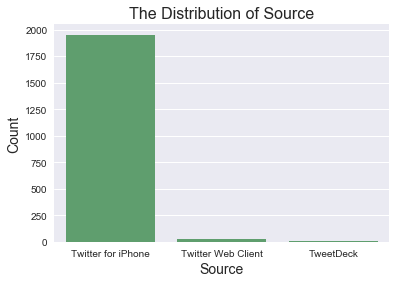

In [519]:
source_order = df_clean['source'].value_counts().index

base_color = sns.color_palette()[1]
sns.countplot(data = df_clean, x='source', color= base_color, order = source_order)
plt.xlabel('Source', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('The Distribution of Source',fontsize=16);

This plot shows the distribution of source. We can see that the dominate source of tweets is from iPhone twitter app, which is 94% in the total. That means the twitter app is the main channel for people using to tweet, retweet, post, and others, while the TweetDeck and Twitter  pretty rare (less than 1%).

**2. The Distribution of Dog Stages**

In [520]:
df_clean['stage'].value_counts()

None        1684
pupper      203 
doggo       63  
puppo       22  
Multiple    11  
floofer     7   
Name: stage, dtype: int64

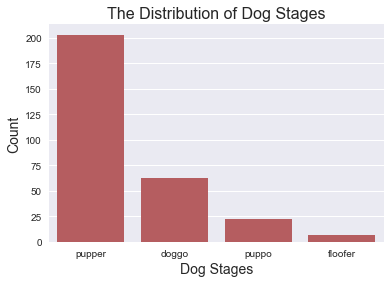

In [541]:
base_color = sns.color_palette()[2]
sns.set(style="darkgrid")
sns.countplot(data = df_clean, x = 'stage', order = ["pupper", "doggo", "puppo", "floofer"], orient = 'h', color = base_color)
plt.xticks(rotation = 360)
plt.xlabel('Dog Stages', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('The Distribution of Dog Stages',fontsize=16);

There is a lot of missing data in dog stage. But if we do not include missing data, then the distribution of dog stages shows that ‘pupper’ (a small doggo, usually younger) is the most popular dog stage, followed by ‘doggo’, ‘puppo’ and 'floofer'. It could be due to the young and unmatured dog is usually cuter than the adult dog.

**3. Relationship between retweet_count and favorite_count**

In [522]:
df_clean[['retweet_count', 'favorite_count']].corr()

,retweet_count,favorite_count
retweet_count,1.000000,0.912987
favorite_count,0.912987,1.000000


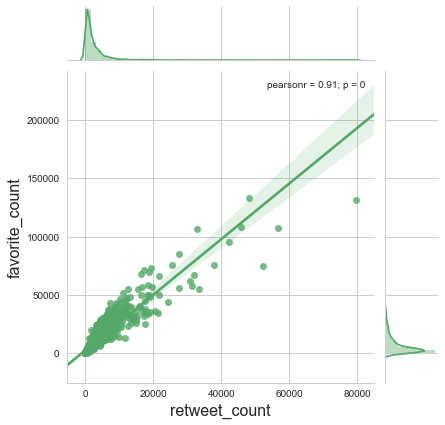

In [537]:
sns.jointplot(data=df_clean, x='retweet_count', y='favorite_count', kind='reg', color='g')
plt.xlabel('retweet_count', fontsize=16)
plt.ylabel('favorite_count', fontsize=16);

It is seen that most popular tweets usually get a large number of retweets and favorite counts. As shown above correlation between ‘retweet_count’ and ‘favorite_count’ is 0.929101, that is a high value showing a strong positive relationship between ‘retweet_count’ and ‘favorite_count’. The plot above also confirms this linear relationship.

**4. Most popular dog names**

In [524]:
df_clean['name'].value_counts()[1:11].head(11)

Charlie    11
Lucy       10
Cooper     10
Oliver     10
Tucker     9 
Penny      9 
Winston    8 
Sadie      8 
Lola       7 
Daisy      7 
Name: name, dtype: int64

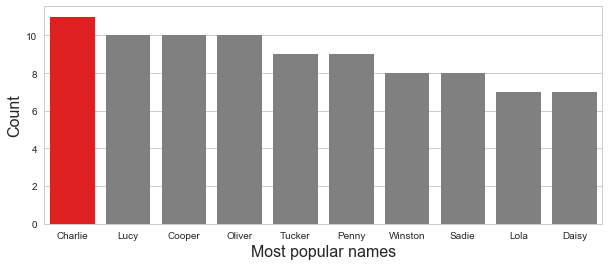

In [536]:
sorted_order = df_clean['name'].value_counts()[1:11].head(11).index
plt.figure(figsize = (10,4))
values = np.count_nonzero(df_clean['name'])
sns.set(style="whitegrid", color_codes=True)

fclrs = ['grey' if (x > min(sorted_order)) else 'red' for x in sorted_order]

sns.countplot(data = df_clean, x = 'name', order = sorted_order, orient = 'h', palette=fclrs)
plt.xlabel('Most popular names', fontsize =16)
plt.ylabel('Count', fontsize =16);

**5. Distribution of Rating**

In [526]:
df_clean['rating'].describe()

count    1990.000000
mean     1.054891   
std      0.218506   
min      0.000000   
25%      1.000000   
50%      1.100000   
75%      1.200000   
max      1.400000   
Name: rating, dtype: float64

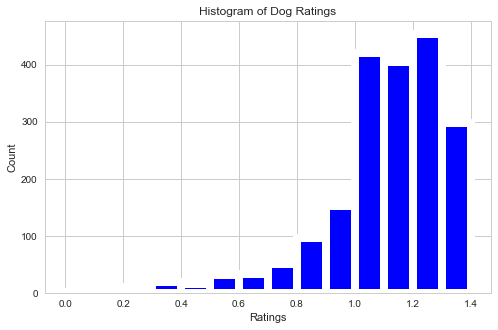

In [534]:
plt.figure(figsize = (8, 5))
plt.xlabel('Ratings')
plt.ylabel('Count')
bins = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1, 1.1, 1.2, 1.3, 1.4]
plt.hist(x = df_clean.rating, 
         edgecolor='white', linewidth=8, bins = bins, color='blue')
plt.title('Histogram of Dog Ratings');

rating calculated as rating_numerator divided by rating_denominator (always 10). Most dogs receive ratings between 10 and 13

**6. Analyzing trend in number of tweets posted over time**

In [528]:
# extracting year and month from timestamp
df_clean['year_month'] =df_clean['timestamp'].apply(lambda x:x.strftime('%Y-%m'))

In [529]:
df_clean['year_month'].value_counts().sort_index()

2015-11    294
2015-12    367
2016-01    169
2016-02    111
2016-03    120
2016-04    54 
2016-05    57 
2016-06    81 
2016-07    87 
2016-08    59 
2016-09    63 
2016-10    65 
2016-11    53 
2016-12    53 
2017-01    66 
2017-02    64 
2017-03    48 
2017-04    41 
2017-05    43 
2017-06    44 
2017-07    49 
2017-08    2  
Name: year_month, dtype: int64

In [530]:
data = pd.DataFrame(df_clean.groupby('year_month')['tweet_id'].count())

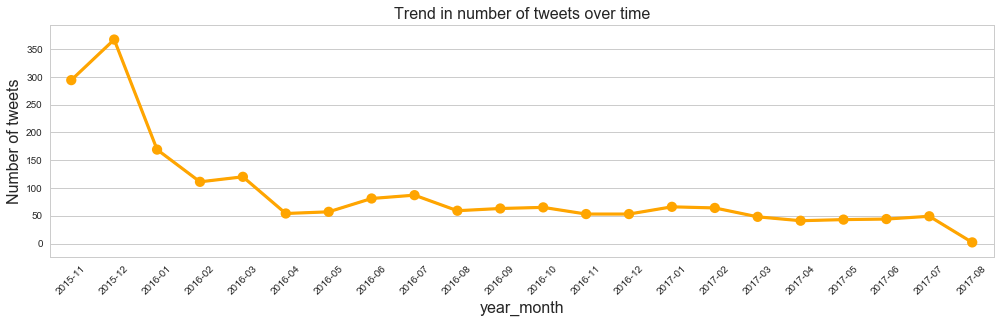

In [531]:
plt.figure(figsize=(14,4))
data['tweet_id'].plot('line')
x = data.index
y = data['tweet_id']
sns.pointplot(x=x, y=y, color='orange')
plt.tight_layout()
plt.xlabel('year_month', fontsize=16)
plt.ylabel("Number of tweets", fontsize=16)
plt.title('Trend in number of tweets over time', fontsize=16)
plt.xticks(rotation =45 );